In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

from tqdm import tqdm

from matplotlib import pyplot as plt

from modules.dataset import AudioDataset
from modules.transformer import TransformerModel
from modulesutils import process_audio_data, split_dataset

In [2]:
audio_dataset = AudioDataset('data/normal', 'data/whistle')

In [3]:
train_dataset, valid_dataset, test_dataset = split_dataset(audio_dataset)

In [4]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
def train_model(model, train_loader, valid_loader, num_epochs, criterion, optimizer, device):
    model.to(device)
    
    train_loss_history, train_acc_history = [], []
    valid_loss_history, valid_acc_history = [], []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        train_loss, train_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Training]'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            
            predicted = torch.argmax(outputs, dim=1)
            train_corrects += torch.sum(predicted == labels).item()

        train_loss /= len(train_loader.dataset)
        train_acc = train_corrects / len(train_loader.dataset)
        
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        model.eval()  # Set the model to evaluation mode
        valid_loss, valid_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(valid_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Validation]'):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                valid_loss += loss.item() * inputs.size(0)
                
                predicted = torch.argmax(outputs, dim=1)
                valid_corrects += torch.sum(predicted == labels).item()

        valid_loss /= len(valid_loader.dataset)
        valid_acc = valid_corrects / len(valid_loader.dataset)
        
        valid_loss_history.append(valid_loss)
        valid_acc_history.append(valid_acc)

        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}\n'
              f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.4f}')

    return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [6]:
model = TransformerModel(n_features=1025, n_classes=2)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model(model, train_loader, valid_loader, num_epochs=25, criterion=criterion, optimizer=optimizer, device=device)

Epoch 1/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.90it/s]


Train Loss: 0.7276, Train Acc: 0.5235
Validation Loss: 0.6490, Validation Acc: 0.5735


Epoch 2/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.90it/s]


Train Loss: 0.6558, Train Acc: 0.5925
Validation Loss: 0.6642, Validation Acc: 0.4265


Epoch 3/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.27it/s]


Train Loss: 0.6270, Train Acc: 0.6238
Validation Loss: 0.5692, Validation Acc: 0.8382


Epoch 4/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.55it/s]


Train Loss: 0.5602, Train Acc: 0.9122
Validation Loss: 0.4909, Validation Acc: 1.0000


Epoch 5/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.46it/s]


Train Loss: 0.4583, Train Acc: 0.9028
Validation Loss: 0.3430, Validation Acc: 0.8382


Epoch 6/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.66it/s]


Train Loss: 0.3667, Train Acc: 0.8401
Validation Loss: 0.2679, Validation Acc: 0.8971


Epoch 7/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.83it/s]


Train Loss: 0.2090, Train Acc: 0.9561
Validation Loss: 0.1414, Validation Acc: 1.0000


Epoch 8/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.13it/s]


Train Loss: 0.1413, Train Acc: 0.9655
Validation Loss: 0.0791, Validation Acc: 1.0000


Epoch 9/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.13it/s]


Train Loss: 0.0825, Train Acc: 0.9843
Validation Loss: 0.0366, Validation Acc: 1.0000


Epoch 10/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.25it/s]


Train Loss: 0.0681, Train Acc: 0.9812
Validation Loss: 0.0243, Validation Acc: 1.0000


Epoch 11/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.00it/s]


Train Loss: 0.0458, Train Acc: 0.9875
Validation Loss: 0.0668, Validation Acc: 1.0000


Epoch 12/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]


Train Loss: 0.0389, Train Acc: 0.9969
Validation Loss: 0.0065, Validation Acc: 1.0000


Epoch 13/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.58it/s]


Train Loss: 0.0286, Train Acc: 0.9937
Validation Loss: 0.0045, Validation Acc: 1.0000


Epoch 14/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.05it/s]


Train Loss: 0.0215, Train Acc: 0.9969
Validation Loss: 0.0020, Validation Acc: 1.0000


Epoch 15/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.49it/s]


Train Loss: 0.0102, Train Acc: 1.0000
Validation Loss: 0.0013, Validation Acc: 1.0000


Epoch 16/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]


Train Loss: 0.0107, Train Acc: 1.0000
Validation Loss: 0.0013, Validation Acc: 1.0000


Epoch 17/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.41it/s]


Train Loss: 0.0080, Train Acc: 1.0000
Validation Loss: 0.0027, Validation Acc: 1.0000


Epoch 18/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.20it/s]


Train Loss: 0.0115, Train Acc: 1.0000
Validation Loss: 0.0174, Validation Acc: 1.0000


Epoch 19/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.50it/s]


Train Loss: 0.0097, Train Acc: 0.9969
Validation Loss: 0.0054, Validation Acc: 1.0000


Epoch 20/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.05it/s]


Train Loss: 0.0025, Train Acc: 1.0000
Validation Loss: 0.0002, Validation Acc: 1.0000


Epoch 21/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 20.34it/s]


Train Loss: 0.0031, Train Acc: 1.0000
Validation Loss: 0.0002, Validation Acc: 1.0000


Epoch 22/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.48it/s]


Train Loss: 0.0056, Train Acc: 1.0000
Validation Loss: 0.0002, Validation Acc: 1.0000


Epoch 23/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.12it/s]


Train Loss: 0.0416, Train Acc: 0.9906
Validation Loss: 0.0012, Validation Acc: 1.0000


Epoch 24/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 21.11it/s]


Train Loss: 0.0158, Train Acc: 0.9969
Validation Loss: 0.0002, Validation Acc: 1.0000


Epoch 25/25 [Validation]: 100%|██████████| 3/3 [00:00<00:00, 19.93it/s]

Train Loss: 0.0077, Train Acc: 0.9969
Validation Loss: 0.0002, Validation Acc: 1.0000


In [36]:
torch.save(model.state_dict(), 'transformer_model.pth')

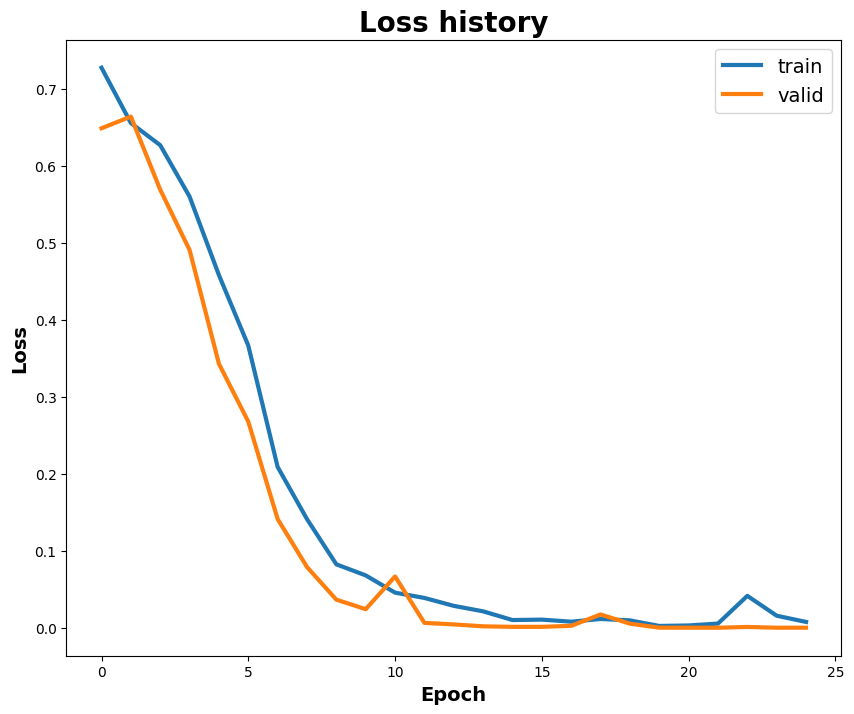

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(train_loss_history, label='train', linewidth=3)
plt.plot(valid_loss_history, label='valid', linewidth=3)
plt.title('Loss history', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)

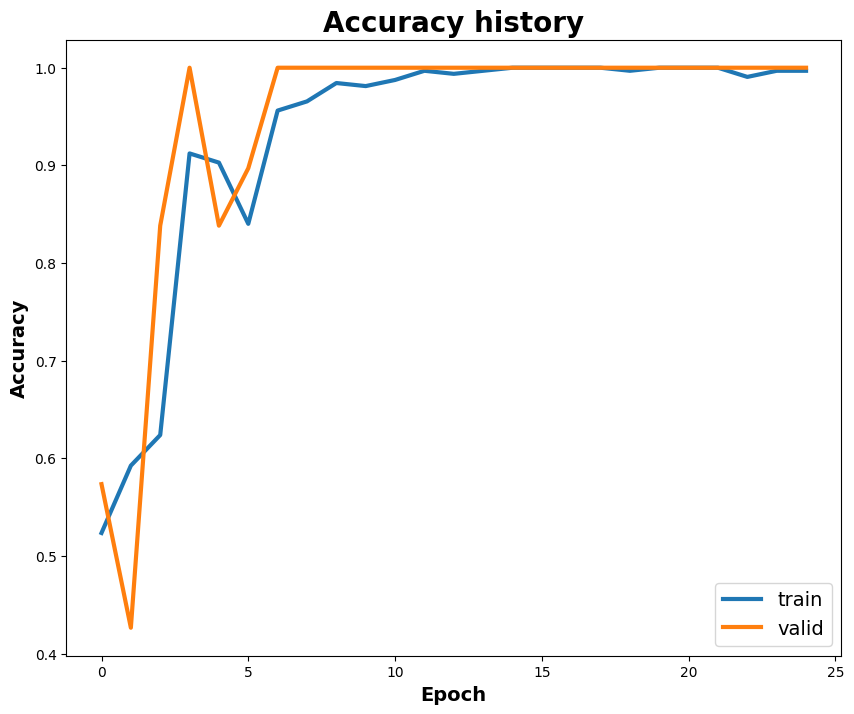

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(train_acc_history, label='train', linewidth=3)
plt.plot(valid_acc_history, label='valid', linewidth=3)
plt.title('Accuracy history', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)

In [39]:
def evaluate_model(model, test_loader, criterion, device):
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    test_loss, test_corrects = 0.0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
           
            predicted = torch.argmax(outputs, dim=1)
            test_corrects += torch.sum(predicted == labels).item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = test_corrects / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [40]:
evaluate_model(model, test_loader, criterion, device)

Test Loss: 0.0014, Test Accuracy: 1.0000


In [41]:
model.to('cpu')

TransformerModel(
  (encoder): Linear(in_features=1025, out_features=512, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Linear(in_features=512, out_features=2, bias=True)
)

In [43]:
spec_db = process_audio_data('resample_data/normal/normal-1.wav')
spec_db = torch.from_numpy(spec_db.T).float()

model.eval()  # Set the model to evaluation mode
outputs = model(spec_db.unsqueeze(0))

print(outputs)

tensor([[ 4.9018, -4.8234]], grad_fn=<AddmmBackward0>)


In [44]:
spec_db = process_audio_data('resample_data/whistle/whistle-1.wav')
spec_db = torch.from_numpy(spec_db.T).float()

model.eval()  # Set the model to evaluation mode
outputs = model(spec_db.unsqueeze(0))

print(outputs)

tensor([[-4.1060,  5.3864]], grad_fn=<AddmmBackward0>)
